In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy
import numpy as np
import os
import scipy as sp
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

### Busca os dados no arquivo csv

In [375]:
test_data = pd.read_csv('testfiles/test.csv')

In [376]:
train_data = pd.read_csv('testfiles/train.csv')

### Visualizando os dados

In [377]:
test_data.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [378]:
train_data.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [403]:
train_data.loc[train_data['IN_DISCALCULIA'] == 1].IN_DISCALCULIA.count()

1

In [406]:
train_data.loc[train_data['IN_DISCALCULIA'] == 1].NU_NOTA_MT.mean()

482.4881958152373

In [404]:
train_data.loc[train_data['IN_DISCALCULIA'] == 1].NU_NOTA_MT

10716    581.1
Name: NU_NOTA_MT, dtype: float64

In [320]:
test_data.shape

(4576, 47)

In [219]:
train_data.shape

(13730, 167)

In [220]:
teste_cols = test_data.columns.values
a = numpy.array(['NU_NOTA_MT', 'TP_PRESENCA_MT'])
teste_cols = numpy.append( teste_cols , a )
teste_cols.size

49

In [221]:
train_data = train_data[teste_cols]

In [222]:
train_data.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT,TP_PRESENCA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,D,D,C,A,A,C,H,A,399.4,1
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,A,A,B,A,A,A,NaN,A,459.8,1
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,D,D,C,A,A,A,NaN,A,NaN,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,H,E,E,C,B,C,F,D,NaN,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,E,D,C,A,A,B,F,A,NaN,0


In [223]:
train_data['TP_SEXO'] = np.where(train_data['TP_SEXO'] == 'F', 0, 1)

In [224]:
train_data = pd.get_dummies(train_data, columns=train_data.loc[:, 'Q001':'Q047'].columns)

In [229]:
train_data.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q027_I,Q027_J,Q027_K,Q027_L,Q027_M,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,1,1,1,1,4,1,...,0,0,0,0,0,1,0,0,0,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,0,3,1,2,0,2,...,0,0,0,0,0,1,0,0,0,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,0,3,1,3,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,0,0,1,1,9,1,...,0,0,0,0,0,0,0,0,1,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,1,2,1,1,4,1,...,0,0,0,0,0,1,0,0,0,0


In [230]:
train_data['NU_NOTA_REDACAO'].isna().sum()

3597

In [231]:
len(train_data.NU_NOTA_MT)

13730

In [232]:
train_data.isnull().sum(axis = 0)

NU_INSCRICAO        0
CO_UF_RESIDENCIA    0
SG_UF_RESIDENCIA    0
NU_IDADE            0
TP_SEXO             0
                   ..
Q047_A              0
Q047_B              0
Q047_C              0
Q047_D              0
Q047_E              0
Length: 102, dtype: int64

In [233]:
# Aqui podemos ver que todos que estiveram na prova tem notas
train_data[(train_data.TP_PRESENCA_CN==1) & (train_data.TP_PRESENCA_CH==1) & (train_data.TP_PRESENCA_LC==1) &
            (train_data.TP_PRESENCA_MT==1)][['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT']]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,436.3,495.4,581.2,399.4
1,474.5,544.1,599.0,459.8
5,439.7,583.2,410.9,364.5
6,420.1,604.2,484.5,529.2
7,619.6,625.8,611.2,566.7
...,...,...,...,...
13725,438.2,419.7,394.5,403.2
13726,423.8,557.9,533.0,452.4
13727,460.5,528.9,569.3,398.0
13728,422.5,621.7,569.0,386.6


In [234]:
# Preenchendo notas com dados nulos com 0 pois são registros que não compareceram ou foram anulados
train_data[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']] = train_data[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].fillna(0)

In [235]:
train_data.NU_NOTA_REDACAO = train_data.NU_NOTA_REDACAO.fillna(0)

In [236]:
train_data.NU_NOTA_MT.isna().sum()

0

In [238]:
train_data.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q027_I,Q027_J,Q027_K,Q027_L,Q027_M,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,1,1,1,1,4,1,...,0,0,0,0,0,1,0,0,0,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,0,3,1,2,0,2,...,0,0,0,0,0,1,0,0,0,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,0,3,1,3,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,0,0,1,1,9,1,...,0,0,0,0,0,0,0,0,1,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,1,2,1,1,4,1,...,0,0,0,0,0,1,0,0,0,0


In [239]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 102 entries, NU_INSCRICAO to Q047_E
dtypes: float64(13), int32(1), int64(21), object(6), uint8(61)
memory usage: 5.0+ MB


In [246]:
train_data

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q027_I,Q027_J,Q027_K,Q027_L,Q027_M,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,1,1,1,1,4,1,...,0,0,0,0,0,1,0,0,0,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,0,3,1,2,0,2,...,0,0,0,0,0,1,0,0,0,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,0,3,1,3,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,0,0,1,1,9,1,...,0,0,0,0,0,0,0,0,1,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,1,2,1,1,4,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,35,SP,20,1,1,1,1,3,1,...,0,0,0,0,0,1,0,0,0,0
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,26,PE,33,0,3,2,1,10,1,...,1,0,0,0,0,1,0,0,0,0
13727,5354503700ecf2388f68990435390b6e1ad454ee,43,RS,15,0,1,1,3,0,1,...,0,0,0,0,0,1,0,0,0,0
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,33,RJ,36,1,3,1,4,0,1,...,0,0,0,0,0,1,0,0,0,0


In [247]:
def checkNulls():
    for (columnName, columnData) in train_data.iteritems():
        if(train_data[columnName].isna().sum() > 0): 
           print('Colunm Name : ', columnName)
           print(' null : ', train_data[columnName].isna().sum())

In [248]:
checkNulls()

Colunm Name :  TP_ENSINO
 null :  9448
Colunm Name :  TP_DEPENDENCIA_ADM_ESC
 null :  9448
Colunm Name :  TP_STATUS_REDACAO
 null :  3597
Colunm Name :  NU_NOTA_COMP1
 null :  3597
Colunm Name :  NU_NOTA_COMP2
 null :  3597
Colunm Name :  NU_NOTA_COMP3
 null :  3597
Colunm Name :  NU_NOTA_COMP4
 null :  3597
Colunm Name :  NU_NOTA_COMP5
 null :  3597


In [250]:
train_data[(train_data.TP_PRESENCA_CN==1)][['TP_PRESENCA_CN','NU_NOTA_CN', 'TP_PRESENCA_CH','NU_NOTA_CH',
                                              'TP_PRESENCA_LC','NU_NOTA_LC', 'TP_PRESENCA_MT','NU_NOTA_MT']]

,TP_PRESENCA_CN,NU_NOTA_CN,TP_PRESENCA_CH,NU_NOTA_CH,TP_PRESENCA_LC,NU_NOTA_LC,TP_PRESENCA_MT,NU_NOTA_MT
0,1,436.3,1,495.4,1,581.2,1,399.4
1,1,474.5,1,544.1,1,599.0,1,459.8
5,1,439.7,1,583.2,1,410.9,1,364.5
6,1,420.1,1,604.2,1,484.5,1,529.2
7,1,619.6,1,625.8,1,611.2,1,566.7
...,...,...,...,...,...,...,...,...
13725,1,438.2,1,419.7,1,394.5,1,403.2
13726,1,423.8,1,557.9,1,533.0,1,452.4
13727,1,460.5,1,528.9,1,569.3,1,398.0
13728,1,422.5,1,621.7,1,569.0,1,386.6


In [27]:
cols.append('CO_UF_NASCIMENTO')

In [255]:
train_data.TP_STATUS_REDACAO = train_data.TP_STATUS_REDACAO.fillna(4)

In [261]:
train_data.NU_NOTA_COMP1 = train_data.NU_NOTA_COMP1.fillna(0) 
train_data.NU_NOTA_COMP2 = train_data.NU_NOTA_COMP2.fillna(0) 
train_data.NU_NOTA_COMP3 = train_data.NU_NOTA_COMP3.fillna(0) 
train_data.NU_NOTA_COMP4 = train_data.NU_NOTA_COMP4.fillna(0) 
train_data.NU_NOTA_COMP5 = train_data.NU_NOTA_COMP5.fillna(0) 

In [264]:
train_data.shape

(13730, 102)

In [265]:
train_data.TP_ENSINO = train_data.TP_ENSINO.fillna(1)

In [267]:
colsObject = train_data.select_dtypes(['object']).columns
colsObject

Index(['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT'],
      dtype='object')

In [268]:
train_data[colsObject]

,NU_INSCRICAO,SG_UF_RESIDENCIA,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,RS,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,CE,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,CE,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,RJ,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,AM,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf
...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,SP,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,PE,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a
13727,5354503700ecf2388f68990435390b6e1ad454ee,RS,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,RJ,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910


In [269]:
train_data = train_data.drop(colsObject, axis=1)

In [270]:
train_data.select_dtypes(['object']).columns

Index([], dtype='object')

In [272]:
train_data = train_data.drop(['TP_DEPENDENCIA_ADM_ESC'], axis=1)

In [273]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 95 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CO_UF_RESIDENCIA   13730 non-null  int64  
 1   NU_IDADE           13730 non-null  int64  
 2   TP_SEXO            13730 non-null  int32  
 3   TP_COR_RACA        13730 non-null  int64  
 4   TP_NACIONALIDADE   13730 non-null  int64  
 5   TP_ST_CONCLUSAO    13730 non-null  int64  
 6   TP_ANO_CONCLUIU    13730 non-null  int64  
 7   TP_ESCOLA          13730 non-null  int64  
 8   TP_ENSINO          13730 non-null  float64
 9   IN_TREINEIRO       13730 non-null  int64  
 10  IN_BAIXA_VISAO     13730 non-null  int64  
 11  IN_CEGUEIRA        13730 non-null  int64  
 12  IN_SURDEZ          13730 non-null  int64  
 13  IN_DISLEXIA        13730 non-null  int64  
 14  IN_DISCALCULIA     13730 non-null  int64  
 15  IN_SABATISTA       13730 non-null  int64  
 16  IN_GESTANTE        137

In [331]:
test_x = test_data.drop(['TP_ENSINO','SG_UF_RESIDENCIA'], axis=1)

In [332]:
test_x.NU_NOTA_CN = test_x.NU_NOTA_CN.fillna(0)
test_x.NU_NOTA_CH = test_x.NU_NOTA_CH.fillna(0)
test_x.NU_NOTA_LC = test_x.NU_NOTA_LC.fillna(0)
test_x.TP_STATUS_REDACAO = test_x.TP_STATUS_REDACAO.fillna(4)
test_x.NU_NOTA_COMP1 = test_x.NU_NOTA_COMP1.fillna(0) 
test_x.NU_NOTA_COMP2 = test_x.NU_NOTA_COMP2.fillna(0) 
test_x.NU_NOTA_COMP3 = test_x.NU_NOTA_COMP3.fillna(0) 
test_x.NU_NOTA_COMP4 = test_x.NU_NOTA_COMP4.fillna(0) 
test_x.NU_NOTA_COMP5 = test_x.NU_NOTA_COMP5.fillna(0)
test_x.NU_NOTA_REDACAO = test_x.NU_NOTA_REDACAO.fillna(0)

In [333]:
test_x['TP_SEXO'] = np.where(test_x['TP_SEXO'] == 'F', 0, 1)

In [334]:
test_x = test_x.drop('NU_INSCRICAO', axis=1)

In [335]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO_UF_RESIDENCIA        4576 non-null   int64  
 1   NU_IDADE                4576 non-null   int64  
 2   TP_SEXO                 4576 non-null   int32  
 3   TP_COR_RACA             4576 non-null   int64  
 4   TP_NACIONALIDADE        4576 non-null   int64  
 5   TP_ST_CONCLUSAO         4576 non-null   int64  
 6   TP_ANO_CONCLUIU         4576 non-null   int64  
 7   TP_ESCOLA               4576 non-null   int64  
 8   IN_TREINEIRO            4576 non-null   int64  
 9   TP_DEPENDENCIA_ADM_ESC  1480 non-null   float64
 10  IN_BAIXA_VISAO          4576 non-null   int64  
 11  IN_CEGUEIRA             4576 non-null   int64  
 12  IN_SURDEZ               4576 non-null   int64  
 13  IN_DISLEXIA             4576 non-null   int64  
 14  IN_DISCALCULIA          4576 non-null   

In [338]:
test_x = pd.get_dummies(test_x, columns=test_x.loc[:, 'Q001':'Q047'].columns)

In [336]:
test_x = test_x.drop(['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT','TP_DEPENDENCIA_ADM_ESC', 'Q027'], axis=1)

In [339]:
teste_cols = test_x.columns.values
a = numpy.array(['NU_NOTA_MT'])
teste_cols = numpy.append( teste_cols , a )

In [340]:
train_data_norm = train_data[teste_cols]

In [341]:
train_data_norm.shape

(13730, 80)

In [343]:
test_x.shape

(4576, 79)

### Linear Regression

In [344]:
from sklearn.linear_model import LinearRegression

X = train_data_norm.drop('NU_NOTA_MT', axis=1)
Y = train_data_norm['NU_NOTA_MT']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

linear_model = LinearRegression()

linear_model.fit(X_train, Y_train)

linear_model.score(X_train, Y_train)


0.9159806471641907

In [345]:
y_predict = linear_model.predict(x_test)
r_square = linear_model.score(x_test, y_test)
r_square

0.9138978401761481

In [346]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_predict, y_test))

67.1941273188558

In [347]:
predictors = X_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

TP_PRESENCA_CH    -84.209698
TP_PRESENCA_CN    -84.209698
IN_DISLEXIA       -75.366434
IN_IDOSO          -24.650834
Q006_A            -20.314937
                     ...    
TP_SEXO            20.556215
Q006_P             35.643959
Q006_M             36.255662
IN_DISCALCULIA     80.462166
TP_PRESENCA_LC    236.079886
Length: 79, dtype: float64


In [348]:
x_column = np.arange(y_predict.size)

In [349]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_column, y=y_predict,
                    mode='lines',
                    name='Predict Values of train'))
fig.add_trace(go.Scatter(x=x_column, y=y_test.values,
                    mode='lines+markers',
                    name='Teste Values of train'))
fig.show()

In [350]:
predictions = linear_model.predict(test_x)

In [351]:
roudPredictions = np.around(predictions, decimals=4)

In [352]:
df_answer = pd.DataFrame({'NU_INSCRICAO': test_data.NU_INSCRICAO, 'NU_NOTA_MT':roudPredictions})

In [353]:
df_answer.set_index('NU_INSCRICAO')

,NU_NOTA_MT
NU_INSCRICAO,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,424.9505
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,452.1077
b38a03232f43b11c9d0788abaf060f7366053b6d,568.3466
70b682d9a3636be23f6120fa9d6b164eb3c6002d,-5.0885
715494628a50142ce8cb17191cfe6d0f3cae0934,559.6145
...,...
dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,437.9081
a75fa8770257e7c9368d059fe53d9ef431f4bdef,456.0668
655fa6306720ff16e825903b5422a46608a77545,623.6142


In [355]:
df_answer.to_csv('answer.csv',index=False)

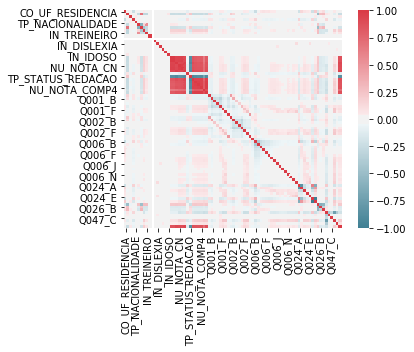

In [356]:
import seaborn as sns
corr = train_data_norm.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [357]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [358]:
randomForestModel = RandomForestRegressor()

In [366]:
X_train.shape

(10984, 79)

In [368]:
y_test.shape

(2746,)

In [359]:
randomForestModel.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [360]:
randomf_predict = randomForestModel.predict(x_test)

In [365]:
randomf_predict.size

2746

In [362]:
mse = mean_squared_error(y_test, randomf_predict)
rmse = np.sqrt(mse)
rmse

62.72697918607487

In [363]:
randomForestModel.score(x_test, y_test)

0.9249656445577099

In [372]:
randomf_predict = randomForestModel.predict(test_x)

In [373]:
df_answer = pd.DataFrame({'NU_INSCRICAO': test_data.NU_INSCRICAO, 'NU_NOTA_MT':randomf_predict})

In [374]:
df_answer.to_csv('answer.csv',index=False)

In [124]:
from sklearn import linear_model

In [147]:
reg = linear_model.Ridge(alpha=.5, random_state=0)
reg.fit(X_train, Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)